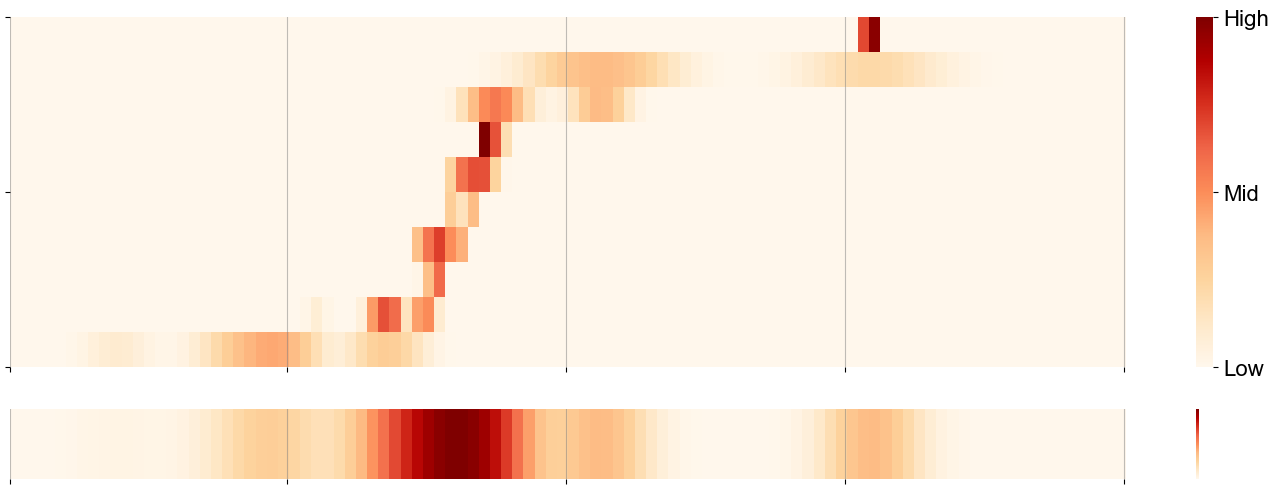

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

data = refined_importations_data
time_range = np.linspace(2022.67, 2024.67, 100)
heatmap_data_cumsum = np.zeros((10, len(time_range)))

for i, cumsum_level in enumerate(range(1, 11)):
    subset = data[data['cumsum'] == cumsum_level]['value']
    if len(subset) > 1:
        kde = gaussian_kde(subset)
        heatmap_data_cumsum[i, :] = kde(time_range)

heatmap_data_cumsum = np.log1p(heatmap_data_cumsum)

subset_all = data['value']
heatmap_data_all = np.zeros((1, len(time_range)))
if len(subset_all) > 1:
    kde_all = gaussian_kde(subset_all)
    heatmap_data_all[0, :] = kde_all(time_range)

heatmap_data_all = np.log1p(heatmap_data_all)

vmin_cumsum, vmax_cumsum = heatmap_data_cumsum.min(), heatmap_data_cumsum.max()
vmin_all, vmax_all = heatmap_data_all.min(), heatmap_data_all.max()

fig, axes = plt.subplots(2, 1, figsize=(18, 6), gridspec_kw={'height_ratios': [5, 1]})

sns.heatmap(
    heatmap_data_cumsum, cmap="OrRd", cbar=True, ax=axes[0],
    xticklabels=False, yticklabels=np.arange(1, 11),
    vmin=vmin_cumsum, vmax=vmax_cumsum,
    cbar_kws={"orientation": "vertical"}
)

cbar = axes[0].collections[0].colorbar
cbar.set_ticks([vmin_cumsum, (vmin_cumsum + vmax_cumsum)/2, vmax_cumsum])
cbar.set_ticklabels(['Low', 'Mid', 'High'])
cbar.ax.tick_params(labelsize=16)

axes[0].invert_yaxis()
axes[0].set_ylim(0, 10)
axes[0].set_ylabel(None)
axes[0].set_yticks([0, 5, 10])

sns.heatmap(
    heatmap_data_all, cmap="OrRd", cbar=True, ax=axes[1],
    xticklabels=False,
    vmin=vmin_all, vmax=vmax_all,
    cbar_kws={"orientation": "vertical"}
)
axes[1].set_ylabel(None)
axes[1].set_yticks([])

time_labels = ['Sep.\n2022', 'Mar.\n2023', 'Sep.\n2023', 'Mar.\n2024', 'Sep.\n2024']
time_ticks = pd.to_datetime(['09-01-22', '03-01-23', '09-01-23', '03-01-24', '09-01-24']).to_series().apply(lambda x: x.year + (x.month - 1) / 12).to_list()
xtick_positions = np.interp(time_ticks, (2022.67, 2024.67), (0, len(time_range)))

for ax in axes:
    ax.set_xlim((0, len(time_range)))
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels([])
    ax.tick_params(axis='both', labelsize=18)

for ax in axes:
    ax.grid(axis='x', ls='-', color='gray', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

cbar = ax.collections[0].colorbar
cbar.set_ticks([])

plt.show()
fig.savefig('fig_5_AB.svg')
fig.savefig('fig_5_AB.pdf')


C:\Users\47434\AppData\Local\Temp\ipykernel_63696\3945737063.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_ticks = pd.to_datetime(['09-01-22', '03-01-23', '09-01-23', '03-01-24', '09-01-24']).to_series().apply(lambda x: x.year + (x.month - 1) / 12).to_list()


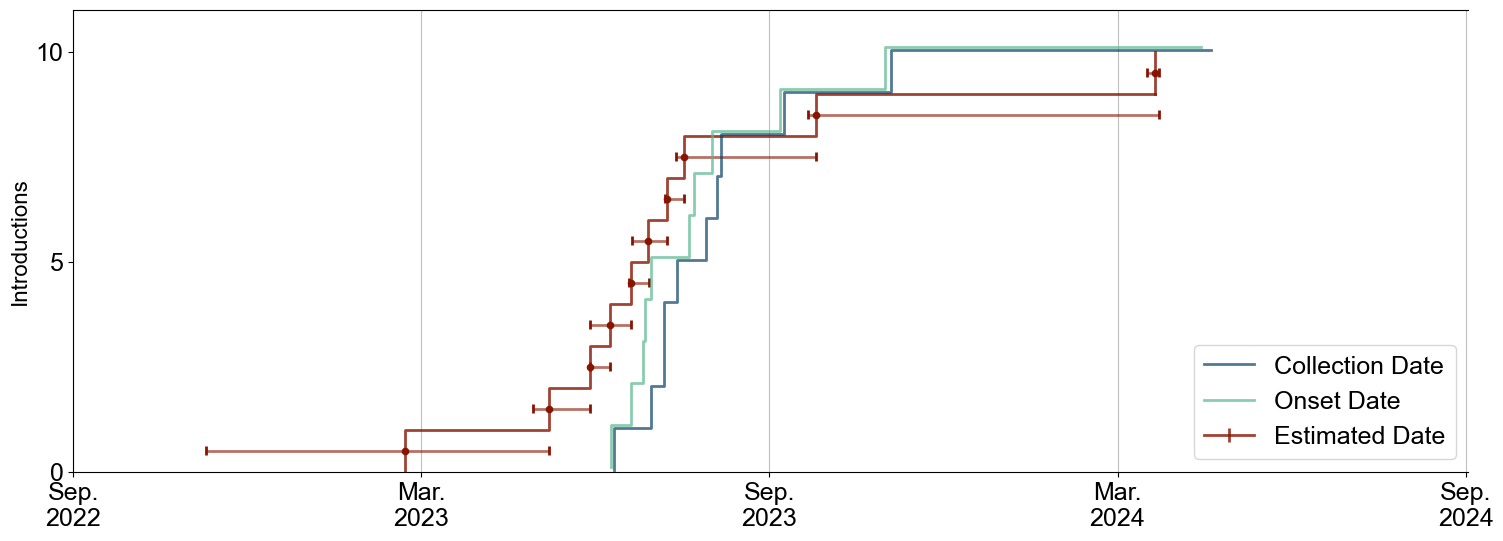

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D

plt.rcParams['font.family'] = 'Arial'

data = pd.read_csv('data/hpd_results.csv')
df = pd.DataFrame(data)

time_labels = ['Sep.\n2022', 'Mar.\n2023', 'Sep.\n2023', 'Mar.\n2024', 'Sep.\n2024']
time_ticks = pd.to_datetime(['09-01-22', '03-01-23', '09-01-23', '03-01-24', '09-01-24']).to_series().apply(lambda x: x.year + (x.month - 1) / 12).to_list()

line_color = '#881400'

fig, ax = plt.subplots(figsize=(18, 6))

for idx, row in df.iterrows():
    ax.hlines(y=row['y_value'] - 0.5, xmin=row['HPD_low'], xmax=row['HPD_high'], colors=line_color, linewidth=2, alpha=0.6)
    
    lines = [
        [(row['HPD_low'], row['y_value']-0.6), (row['HPD_low'], row['y_value']-0.4)],
        [(row['HPD_high'], row['y_value']-0.6), (row['HPD_high'], row['y_value']-0.4)],
    ]
    lc = LineCollection(lines, colors=line_color, linewidths=2)
    ax.add_collection(lc)
    
    ax.scatter(row['HPD_mid'], row['y_value'] - 0.5, color='#881400', s=20, zorder=5)

ax.step(df['HPD_mid'], df['y_value'] - 1, color='#881400', linewidth=2, alpha=0.8, label='Estimated Mid Date')
last_mid = df['HPD_mid'].iloc[-1]
last_y = df['y_value'].iloc[-1]
ax.plot([last_mid, last_mid], [last_y-1, last_y], color='#881400', linewidth=2, alpha=0.8)

ax.set_xlim((2022.67, 2024.67))
ax.set_xticks(time_ticks)
ax.set_xticklabels(time_labels, fontsize=18)
ax.set_ylabel('Introductions', fontname='Arial', fontsize=16)
ax.set_ylim(0, 11)
ax.set_yticks([0, 5, 10])

df1 = pd.read_csv('data/in_global_v4.csv')
df2 = pd.read_csv('data/introduction.csv')

df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df1 = df1.sort_values(by='date')
df2 = df2.sort_values(by='date')

df1['cumsum'] = range(1, len(df1) + 1)
df2['cumsum'] = range(1, len(df2) + 1)

def date_to_year_decimal(date):
    start_of_year = pd.Timestamp(year=date.year, month=1, day=1)
    day_of_year = (date - start_of_year).days + 1
    total_days_in_year = 366 if date.year % 4 == 0 and (date.year % 100 != 0 or date.year % 400 == 0) else 365
    return date.year + (day_of_year - 1) / total_days_in_year

df1['year_decimal'] = df1['date'].apply(date_to_year_decimal)
df2['year_decimal'] = df2['date'].apply(date_to_year_decimal)

line_color1 = '#074166'
line_color2 = '#59b78f'

ax.step(df1['year_decimal'], df1['cumsum'] - 0.95, color=line_color1, linewidth=2, label='Collection Date', alpha=0.7)
ax.step(df2['year_decimal'], df2['cumsum'] - 0.9, color=line_color2, linewidth=2, label='Onset Date', alpha=0.7)

custom_lines = [
    Line2D([0], [0], color=line_color1, linewidth=2, alpha=0.7),
    Line2D([0], [0], color=line_color2, linewidth=2, alpha=0.7),
    Line2D([0], [0], color='#881400', linewidth=2, alpha=0.8, marker='|', markersize=10, markeredgewidth=2)
]
ax.legend(custom_lines, ['Collection Date', 'Onset Date', 'Estimated Date'], loc='lower right', fontsize=18)

ax.grid(axis='x', ls='-', color='gray', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=18)

plt.savefig('fig/fig_5_C.pdf')
plt.savefig('fig/fig_5_C.svg')

plt.show()



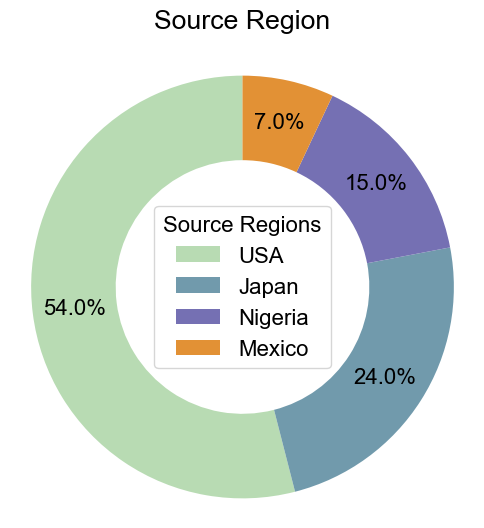

In [4]:
import matplotlib.pyplot as plt

# 设置全局字体和样式
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16

# 排序并处理 top 5 + Others
source_counts = source_distribution.sort_values(ascending=False)
top_5 = source_counts.head(5)

final_counts = pd.concat([top_5])

colors = ['#b8dbb3', '#719aac', '#7570b3', '#e29135', '#66a61e', '#e6ab02']

# 创建百分比标签函数
def make_autopct(values):
    def my_autopct(pct):
        if pct > 3:
            return f'{pct:.1f}%'
        return ''
    return my_autopct

# 绘制环形图
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(final_counts.values, labels=None, colors=colors, startangle=90,
                                  autopct=make_autopct(final_counts), pctdistance=0.8,
                                  wedgeprops=dict(width=0.4, edgecolor='none'))

# 添加标题
ax.set_title('Source Region', pad=20)

# 添加图例到中心
ax.legend(wedges, final_counts.index, title="Source Regions", loc="center")

# 确保为圆形
ax.axis('equal')

# 保存为PDF和SVG
plt.savefig('/mnt/d/hanjia/2.10/sup_source/fig_first_region.pdf', bbox_inches='tight', dpi=1000)
plt.savefig('/mnt/d/hanjia/2.10/sup_source/fig_first_region.svg', format='svg')

plt.show()

In [3]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

def dtw_with_path(x, y):
    n, m = len(x), len(y)
    cost_matrix = cdist(x.reshape(-1, 1), y.reshape(-1, 1), metric='euclidean')
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            dtw_matrix[i, j] = cost_matrix[i-1, j-1] + min(
                dtw_matrix[i-1, j],
                dtw_matrix[i, j-1],
                dtw_matrix[i-1, j-1]
            )

    path = []
    i, j = n, m
    while i > 0 and j > 0:
        path.append((i-1, j-1))
        candidates = [
            (dtw_matrix[i-1, j-1], (i-1, j-1)),
            (dtw_matrix[i-1, j], (i-1, j)),
            (dtw_matrix[i, j-1], (i, j-1))
        ]
        _, (next_i, next_j) = min(candidates)
        i, j = next_i, next_j

    path.reverse()
    return dtw_matrix[n, m], path

def calculate_credible_interval(data, confidence=0.95):
    alpha = 1 - confidence
    lower_percentile = (alpha / 2) * 100
    upper_percentile = (1 - alpha / 2) * 100
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

def calculate_alignment_stats(x, y, path):
    aligned_x, aligned_y = [], []
    for i, j in path:
        aligned_x.append(x[i])
        aligned_y.append(y[j])
    aligned_x = np.array(aligned_x)
    aligned_y = np.array(aligned_y)
    differences = np.abs(aligned_x - aligned_y)
    median_diff = np.median(differences)
    cri_lower, cri_upper = calculate_credible_interval(differences, confidence=0.95)
    return {
        'aligned_x': aligned_x,
        'aligned_y': aligned_y,
        'differences': differences,
        'mean_diff': np.mean(differences),
        'std_diff': np.std(differences),
        'median_diff': median_diff,
        'cri_lower': cri_lower,
        'cri_upper': cri_upper,
        'path_length': len(path)
    }

def main():
    in_global = pd.read_csv('data/in_global_v4.csv')
    hpd_results = pd.read_csv('data/hpd_results.csv')

    in_global['date'] = pd.to_datetime(in_global['date'])
    in_global_years = (in_global['date'].dt.year + 
                       (in_global['date'].dt.dayofyear - 1) / 365.25).values
    hpd_mid_years = hpd_results['HPD_mid'].values

    dtw_dist, alignment_path = dtw_with_path(in_global_years, hpd_mid_years)
    normalized_dtw = dtw_dist / (len(in_global_years) + len(hpd_mid_years))
    alignment_stats = calculate_alignment_stats(in_global_years, hpd_mid_years, alignment_path)

    print(f"DTW distance: {dtw_dist:.4f}")
    print(f"Normalized DTW: {normalized_dtw:.4f}")
    print(f"Alignment path length: {alignment_stats['path_length']}")
    print(f"Mean difference (years): {alignment_stats['mean_diff']:.4f}")
    print(f"Std difference (years): {alignment_stats['std_diff']:.4f}")
    print(f"Median difference (years): {alignment_stats['median_diff']:.4f}")
    print(f"95% credible interval (years): [{alignment_stats['cri_lower']:.4f}, {alignment_stats['cri_upper']:.4f}]")
    print(f"Mean difference (days): {alignment_stats['mean_diff'] * 365.25:.2f}")
    print(f"Median difference (days): {alignment_stats['median_diff'] * 365.25:.2f}")
    print(f"95% credible interval (days): [{alignment_stats['cri_lower'] * 365.25:.2f}, {alignment_stats['cri_upper'] * 365.25:.2f}]")
    print(f"\nin_global series length: {len(in_global_years)}")
    print(f"hpd_results series length: {len(hpd_mid_years)}")

    results = {
        'DTW_Distance': [dtw_dist],
        'Normalized_DTW': [normalized_dtw],
        'Alignment_Path_Length': [alignment_stats['path_length']],
        'Mean_Difference_Years': [alignment_stats['mean_diff']],
        'Std_Difference_Years': [alignment_stats['std_diff']],
        'Median_Difference_Years': [alignment_stats['median_diff']],
        'CRI_Lower_Years': [alignment_stats['cri_lower']],
        'CRI_Upper_Years': [alignment_stats['cri_upper']],
        'Mean_Difference_Days': [alignment_stats['mean_diff'] * 365.25],
        'Median_Difference_Days': [alignment_stats['median_diff'] * 365.25],
        'CRI_Lower_Days': [alignment_stats['cri_lower'] * 365.25],
        'CRI_Upper_Days': [alignment_stats['cri_upper'] * 365.25],
        'Series1_Length': [len(in_global_years)],
        'Series2_Length': [len(hpd_mid_years)]
    }
    pd.DataFrame(results).to_csv('dtw_results_complete.csv', index=False)

    path_df = pd.DataFrame(alignment_path, columns=['in_global_index', 'hpd_index'])
    path_df['in_global_value'] = [in_global_years[i] for i, j in alignment_path]
    path_df['hpd_value'] = [hpd_mid_years[j] for i, j in alignment_path]
    path_df['difference'] = alignment_stats['differences']
    path_df.to_csv('dtw_alignment_details.csv', index=False)

    differences_df = pd.DataFrame({
        'difference_years': alignment_stats['differences'],
        'difference_days': alignment_stats['differences'] * 365.25
    })
    differences_df.to_csv('dtw_all_differences.csv', index=False)

    print("\nResults saved to:")
    print("- dtw_results_complete.csv")
    print("- dtw_alignment_details.csv")
    print("- dtw_all_differences.csv")

if __name__ == "__main__":
    main()


DTW distance: 0.8468
Normalized DTW: 0.0403
Alignment path length: 15
Mean difference (years): 0.0565
Std difference (years): 0.0727
Median difference (years): 0.0340
95% credible interval (years): [0.0036, 0.2325]
Mean difference (days): 20.62
Median difference (days): 12.40
95% credible interval (days): [1.30, 84.91]

in_global series length: 11
hpd_results series length: 10

Results saved to:
- dtw_results_complete.csv
- dtw_alignment_details.csv
- dtw_all_differences.csv
